In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from wordcloud import WordCloud
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px



In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
# loading the dataset
import pandas as pd

df =pd.read_csv("athlete_events.csv")
#printing the data columns with the number of rows and

#printing the data columns with the number of rows and
print(f'The DataSet has {df.shape[1]} columns with the headings of {df.columns} and contains {df.shape[0]} rows')


The DataSet has 15 columns with the headings of Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object') and contains 271116 rows


In [7]:
df.head(7)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
pd.isnull(df).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of            ID   Name    Sex    Age  Height  Weight   Team    NOC  Games  \
0       False  False  False  False   False   False  False  False  False   
1       False  False  False  False   False   False  False  False  False   
2       False  False  False  False    True    True  False  False  False   
3       False  False  False  False    True    True  False  False  False   
4       False  False  False  False   False   False  False  False  False   
...       ...    ...    ...    ...     ...     ...    ...    ...    ...   
271111  False  False  False  False   False   False  False  False  False   
271112  False  False  False  False   False   False  False  False  False   
271113  False  False  False  False   False   False  False  False  False   
271114  False  False  False  False   False   False  False  False  False   
271115  False  False  False  False   False   False  False  False  False   

         Year  Season   City  Sport  

In [9]:
#Stage 1: Data Cleansing

In [10]:
# Chalking up missing values 'Medal' with the median
df['Weight'].fillna(df['Weight'].median(), inplace=True)
print(df)


            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN    70.0   
3            4      Edgar Lindenau Aabye   M  34.0     NaN    70.0   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [11]:
# Chalking up missig 'Age' with 'not available'
df['Age'].fillna('Not Available', inplace=True)
print(df)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN    70.0   
3            4      Edgar Lindenau Aabye   M  34.0     NaN    70.0   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [12]:
# Ensuring 'Weight' are not out of range 1-5 or else chalking up with NaN
df['Weight'] =df['Weight'].apply(lambda x: np.nan if x < 1 or x > 5 else x)
print(df)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0     NaN   
1            2                  A Lamusi   M  23.0   170.0     NaN   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0     NaN   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0     NaN   
271112  135570                  Piotr ya   M  27.0   176.0     NaN   
271113  135570                  Piotr ya   M  27.0   176.0     NaN   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0     NaN   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0     NaN   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [13]:
# Removing Duplicates
df.drop_duplicates(inplace=True)
print(df)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0     NaN   
1            2                  A Lamusi   M  23.0   170.0     NaN   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0     NaN   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0     NaN   
271112  135570                  Piotr ya   M  27.0   176.0     NaN   
271113  135570                  Piotr ya   M  27.0   176.0     NaN   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0     NaN   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0     NaN   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [14]:
# Ensuring Team names as str
df['Team'] =df['Team'].str.title()
print(df)




            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0     NaN   
1            2                  A Lamusi   M  23.0   170.0     NaN   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0     NaN   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0     NaN   
271112  135570                  Piotr ya   M  27.0   176.0     NaN   
271113  135570                  Piotr ya   M  27.0   176.0     NaN   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0     NaN   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0     NaN   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [15]:
reviews =df['Event'].dropna()
text =' '.join(reviews)
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
df.shape

(269731, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  object 
 4   Height  210917 non-null  float64
 5   Weight  0 non-null       float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 32.9+ MB


In [18]:
df.head(7)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,NaN,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,NaN,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,NaN,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,NaN,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,NaN,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
#print"Number of missing values in 'Age'
missing_values =df['Age'].isnull().sum()
print("Number of missing values in 'Age':", missing_values)

Number of missing values in 'Age': 0


In [20]:
#print"Number of infinite values in 'Weight'
infinite_values =np.isinf(df['Weight']).sum()
print("Number of infinite values in 'Weight':", infinite_values)


Number of infinite values in 'Weight': 0


In [21]:
df =df.dropna(subset=['Age'])
df =df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Age'])
print(df)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0     NaN   
1            2                  A Lamusi   M  23.0   170.0     NaN   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0     NaN   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0     NaN   
271112  135570                  Piotr ya   M  27.0   176.0     NaN   
271113  135570                  Piotr ya   M  27.0   176.0     NaN   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0     NaN   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0     NaN   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [22]:
#Stage 2 : Decriptive Analysis

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

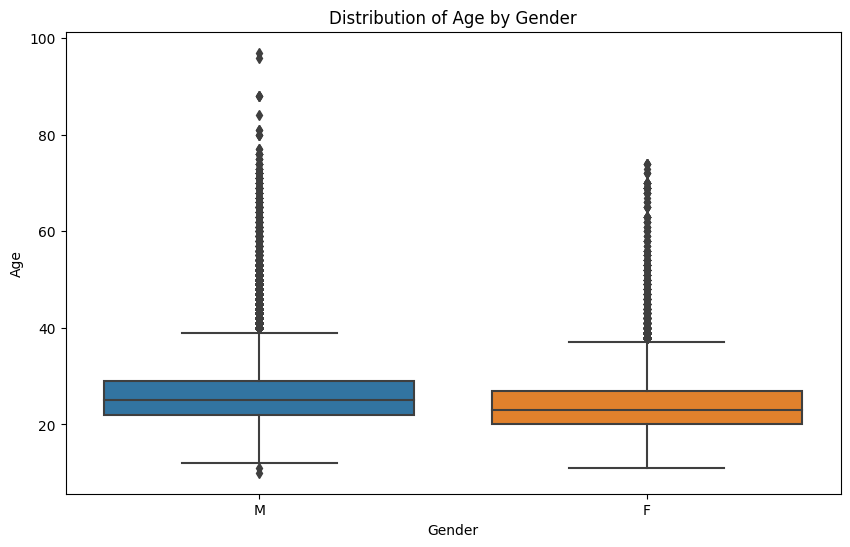

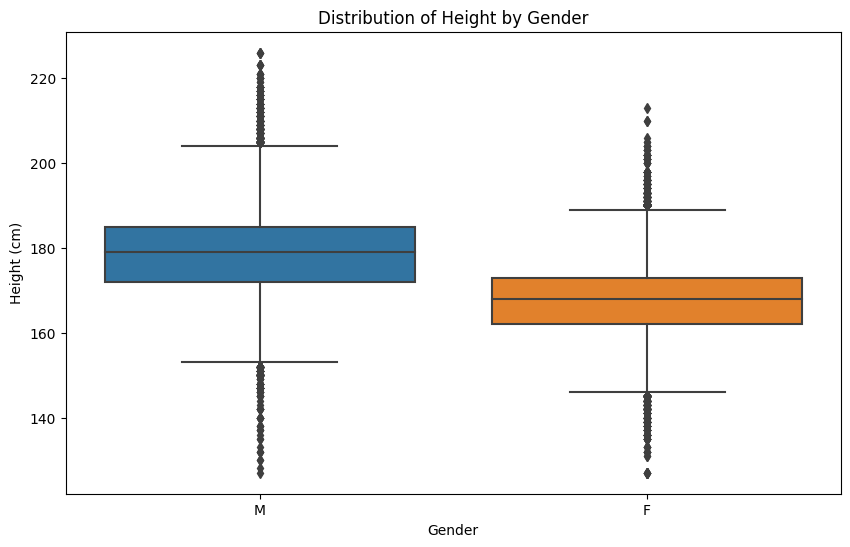

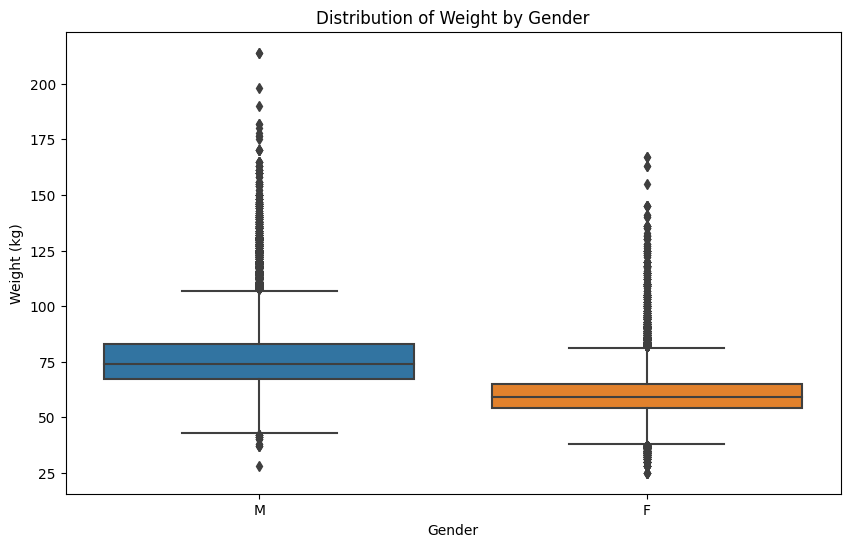

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Box plot for age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Distribution of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Box plot for height distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Height', data=df)
plt.title('Distribution of Height by Gender')
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.show()

# Box plot for weight distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Weight', data=df)
plt.title('Distribution of Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()



   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

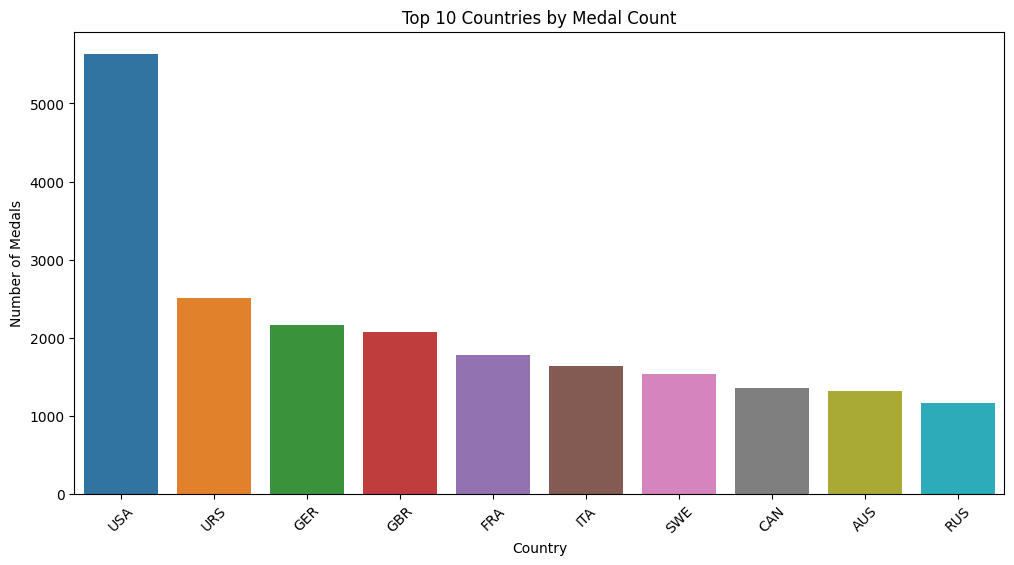

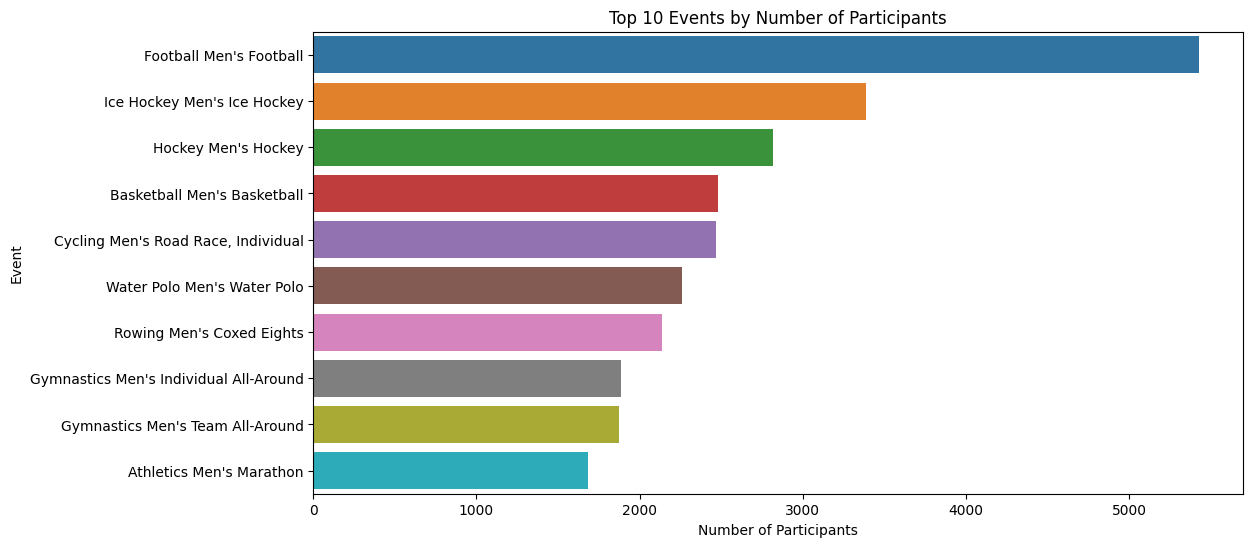

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Grouping data by country and counting the number of medals won
medals_by_country = df.groupby('NOC')['Medal'].count().reset_index()

# Sorting countries by the number of medals won
medals_by_country_sorted = medals_by_country.sort_values(by='Medal', ascending=False).head(10)

# Bar plot for top 10 countries by medal count
plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Medal', data=medals_by_country_sorted)
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Grouping data by event and counting the number of participants
participants_by_event = df.groupby('Event')['Name'].nunique().reset_index()

# Sorting events by the number of participants
participants_by_event_sorted = participants_by_event.sort_values(by='Name', ascending=False).head(10)

# Bar plot for top 10 events by number of participants
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Event', data=participants_by_event_sorted)
plt.title('Top 10 Events by Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Event')
plt.show()

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14740\650579172.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Age'], shade=True)


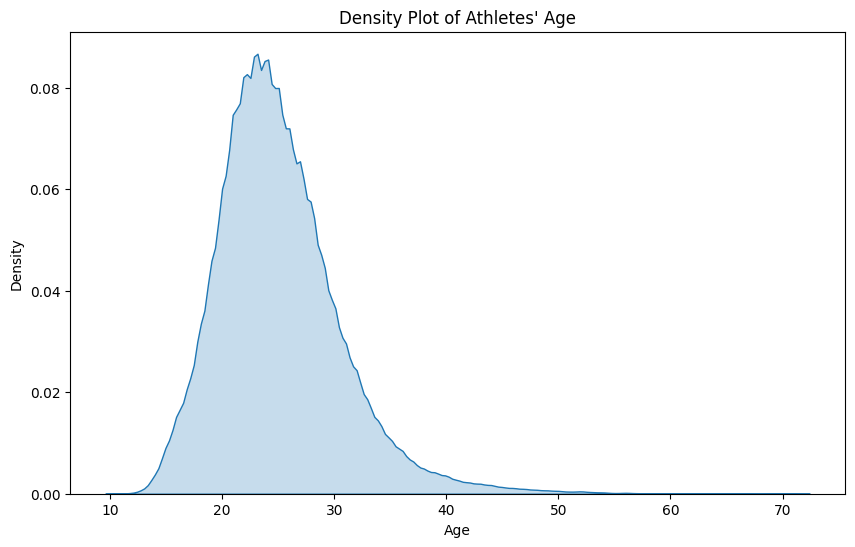

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14740\650579172.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Height'], shade=True)


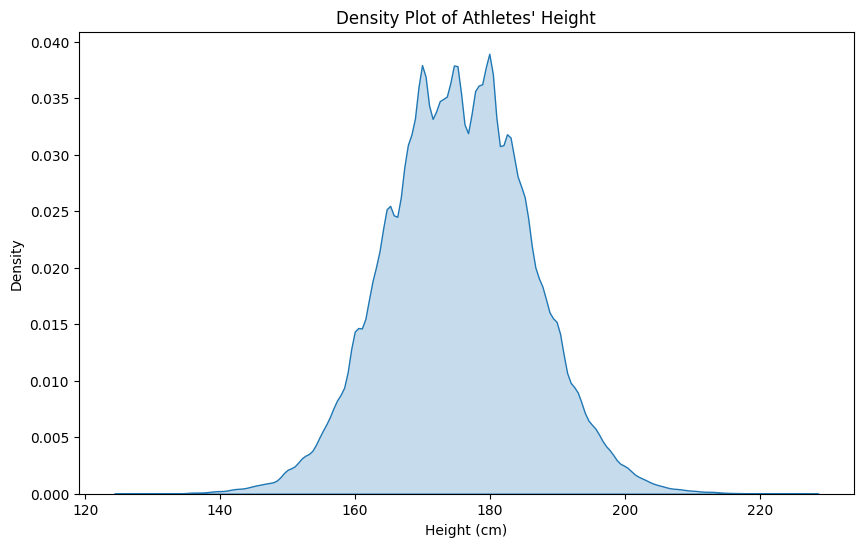

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Filter out null values in 'Age' and 'Height' columns
df_cleaned = df.dropna(subset=['Age', 'Height'])

# Density plot for age distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['Age'], shade=True)
plt.title('Density Plot of Athletes\' Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Density plot for height distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['Height'], shade=True)
plt.title('Density Plot of Athletes\' Height')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

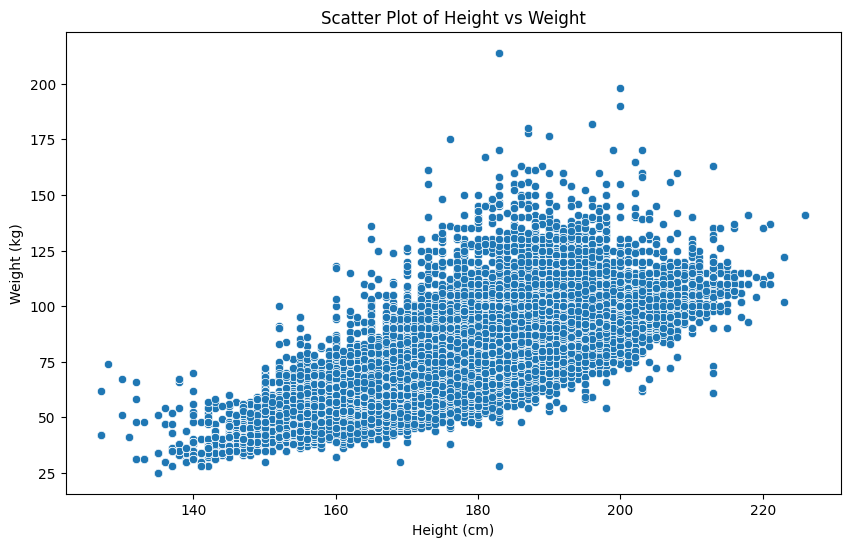

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Filter out null values in 'Height' and 'Weight' columns
df_cleaned = df.dropna(subset=['Height', 'Weight'])

# Scatter plot for height vs weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df_cleaned)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Filter out null values in relevant columns
df_cleaned = df.dropna(subset=['Height', 'Weight', 'Medal'])  # Example selection of relevant columns

# Swarm plot for height distribution by medal type
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Medal', y='Height', data=df_cleaned)
plt.title('Swarm Plot of Height by Medal Type')
plt.xlabel('Medal')
plt.ylabel('Height (cm)')
plt.show()

# Swarm plot for weight distribution by medal type
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Medal', y='Weight', data=df_cleaned)
plt.title('Swarm Plot of Weight by Medal Type')
plt.xlabel('Medal')
plt.ylabel('Weight (kg)')
plt.show()



   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Filter out null values in relevant columns
df_cleaned = df.dropna(subset=['Height', 'Weight', 'Medal'])  # Example selection of relevant columns

# Group the data by athlete and calculate the total number of medals won by each athlete
athlete_medal_counts = df_cleaned.groupby('Name')['Medal'].count()

# Group the data by athlete and calculate the average height and weight of each athlete
athlete_height_weight = df_cleaned.groupby('Name').agg({'Height': 'mean', 'Weight': 'mean'})

# Merge the two dataframes on the athlete's name
athlete_data = pd.merge(athlete_medal_counts, athlete_height_weight, left_index=True, right_index=True)

# Create a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(athlete_data['Height'], athlete_data['Weight'], s=athlete_data['Medal'] * 20, alpha=0.5)
plt.title('Bubble Chart of Athlete Height, Weight, and Medals')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()



In [ ]:
#Stage 3 : Diagnostic Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Filter out null values in relevant columns
df_cleaned = df.dropna(subset=['Height', 'Weight', 'Age'])  # Example selection of relevant columns

# Select relevant columns for heatmap
heatmap_data = df_cleaned[['Height', 'Weight', 'Age']]

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Between Height, Weight, and Age')
plt.show()

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Example: Create a word cloud for event names
event_names = df['Event'].dropna().astype(str)

# Join all event names into a single string
text = ' '.join(event_names)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Event Names')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("athlete_events.csv")  # Assuming you have a CSV file with sentiment scores

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Group the data by Medal count categories and count the number of occurrences in each category
 Medal_counts = df['Medal'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(Medal_count, labels=Medal_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medal')
plt.axis('Name')  # Name aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
#Stage 4 : Predictive Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset (assuming it has columns 'Year' and 'Medal')
df = pd.read_csv("athlete_events_.csv")  # Assuming you have a CSV file with Medal and years

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Extracting features and target variable
X = df['Year'].values.reshape(-1, 1)  # Feature: Year
y = df['Medal'].values  # Target variable: Rating

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Making predictions
y_pred = model.predict(X)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Ratings')

# Plotting the prediction line
plt.plot(X, y_pred, color='red', linewidth=2, label='Prediction Line')

plt.title('Athlete Ratings Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Medal')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it has a column 'Year')
df = pd.read_csv("athlete_events.csv")  # Replace with the actual path to your dataset

# Basic data exploration
print(df.head())  # Display the first few rows of the dataframe
print(df.info())  # Summary of the dataframe

# Plot a histogram to visualize the distribution of years
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.show()
